In [129]:
%load_ext autoreload
%autoreload 2
from wbfm.utils.projects.finished_project_data import ProjectData
import numpy as np
import matplotlib.pyplot as plt

font = {'font.size': 14}
plt.rcParams.update(font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/project_config.yaml"
project_data1 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/3-tracking/postprocessing/combined_3d_tracks-1.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : WARNING  Did not find behavioral annotations
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/3-tracking/postprocessing/combined_3d_tracks-1.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/dat/2021-12-17_16-28-19_worm5-channel-0-pco_camera1bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_anno

# Plot example neuron with final filter settings

In [78]:
# neuron = 'neuron_033'
neuron = 'neuron_001'
opt = dict(channel_mode='linear_model', calculation_mode='integration', remove_outliers=True, filter_mode='linear_interpolation')
opt_old = opt.copy()
opt_old['channel_mode'] = 'ratio'

<Figure size 432x288 with 0 Axes>

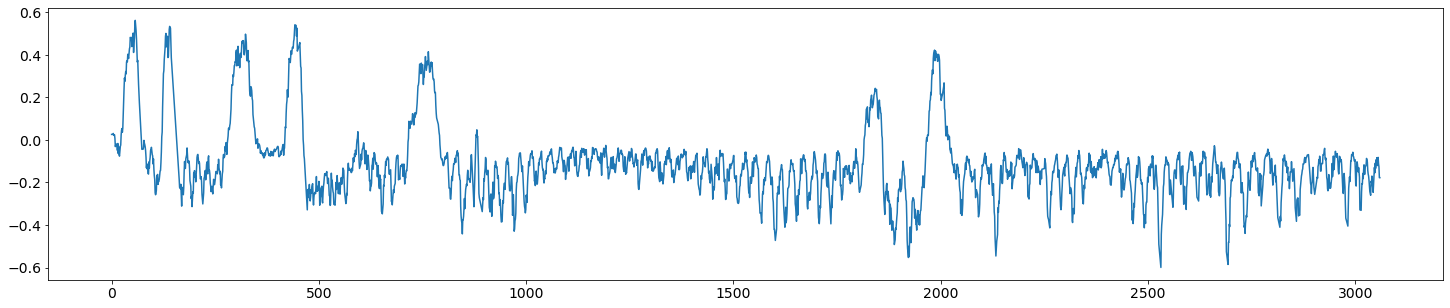

<Figure size 432x288 with 0 Axes>

In [79]:
# Old method: ratio
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt_old)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

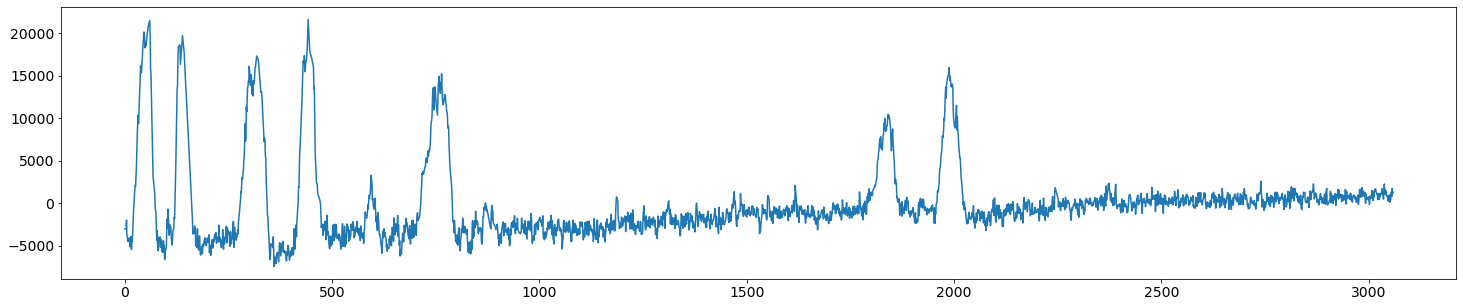

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

In [95]:
project_data1._trace_plotter.background_per_pixel = 80

names = project_data1.finished_neuron_names

df_traces = project_data1._trace_plotter.calculate_traces_full_dataframe(names=names)
df_traces.dropna(axis=1, thresh=2500, inplace=True)

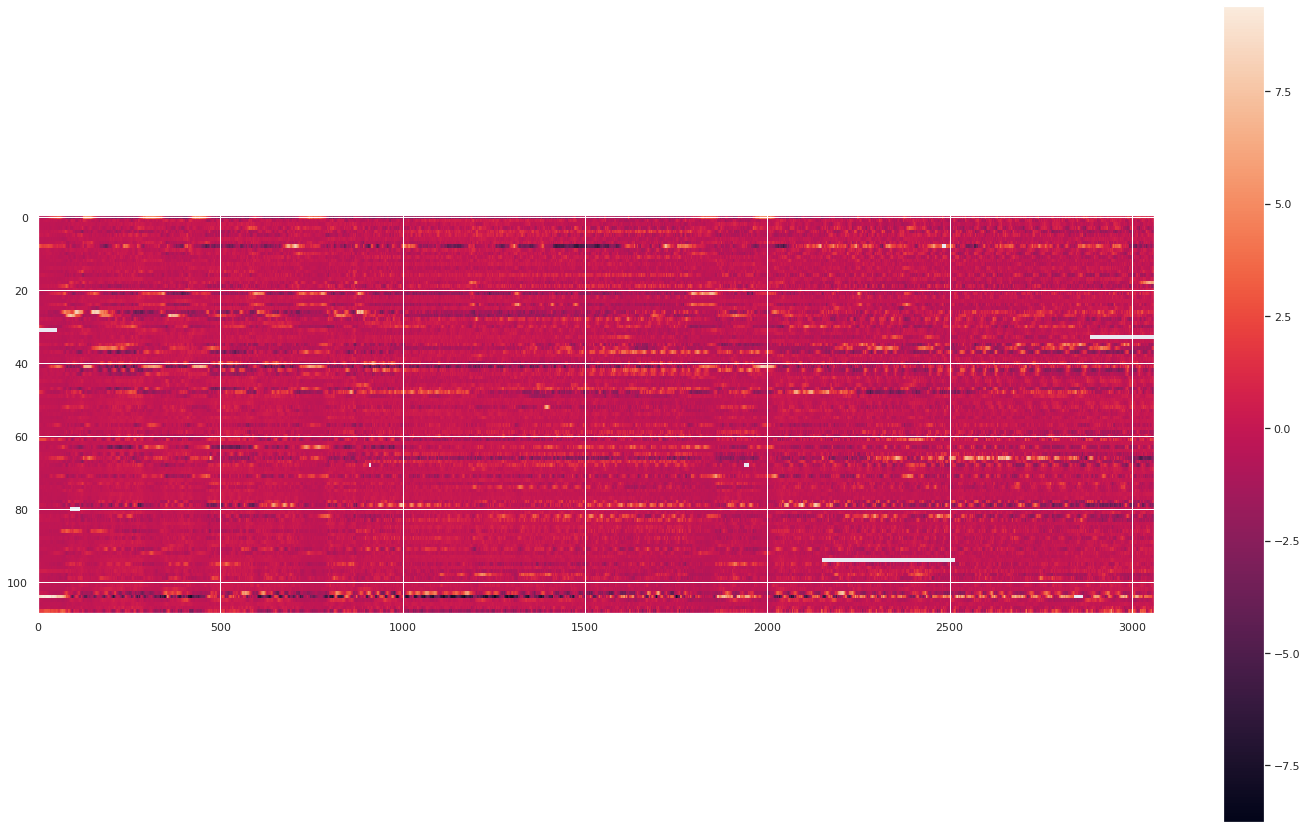

In [96]:
plt.figure(figsize=(25,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_traces.T

data_scaled = scaler.fit_transform(data)

plt.imshow(data_scaled, aspect=10)
plt.colorbar()

# Plot a clustered heatmap
From:
https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [101]:
import seaborn as sns; sns.set_theme(color_codes=True)
from wbfm.utils.general.postprocessing.position_postprocessing import impute_missing_values_in_dataframe

In [104]:
df_imputed = impute_missing_values_in_dataframe(df_traces, d=int(0.9*df_traces.shape[1]))

In [105]:
# scaler = StandardScaler()
# data = df_imputed.T

# data_scaled = scaler.fit_transform(data)

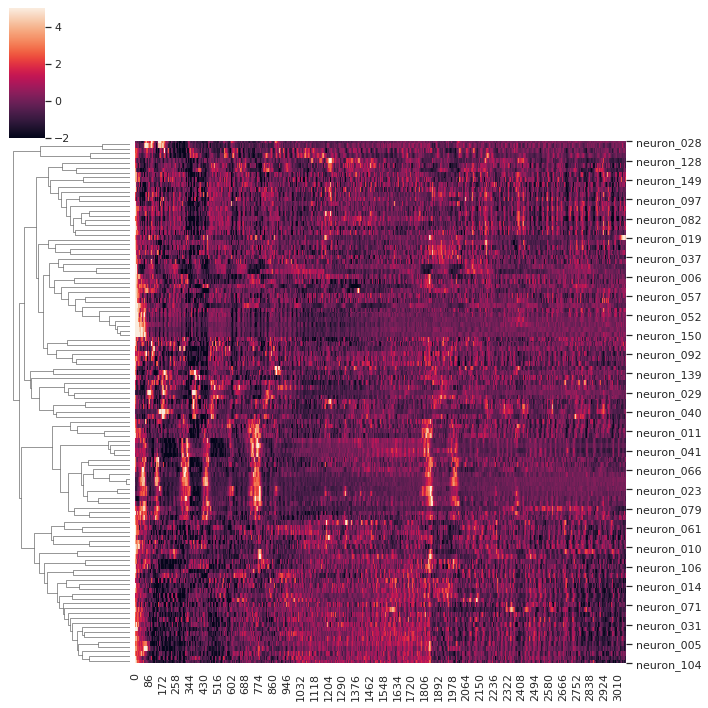

In [115]:
g = sns.clustermap(df_imputed.T, col_cluster=False, vmin=-2, vmax=5,
                   metric="correlation", z_score=0)

## Look at some of the unusual clustered ones

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

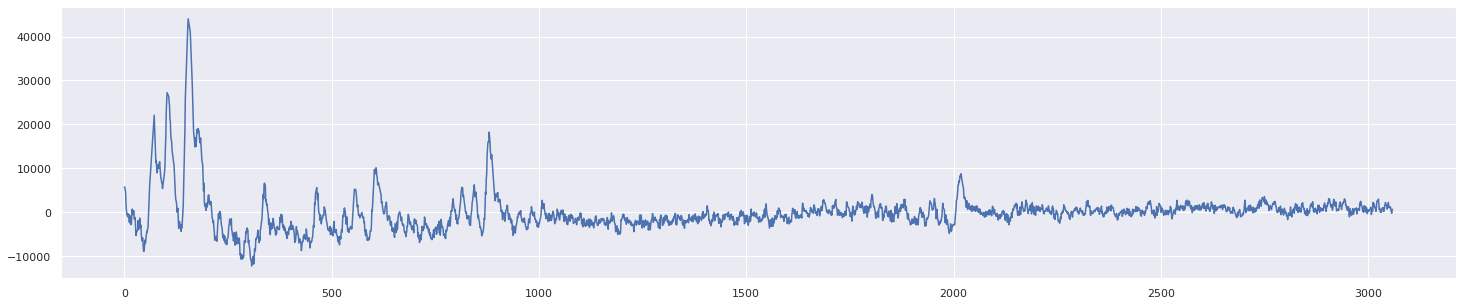

<Figure size 432x288 with 0 Axes>

In [116]:
neuron = 'neuron_028'

plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

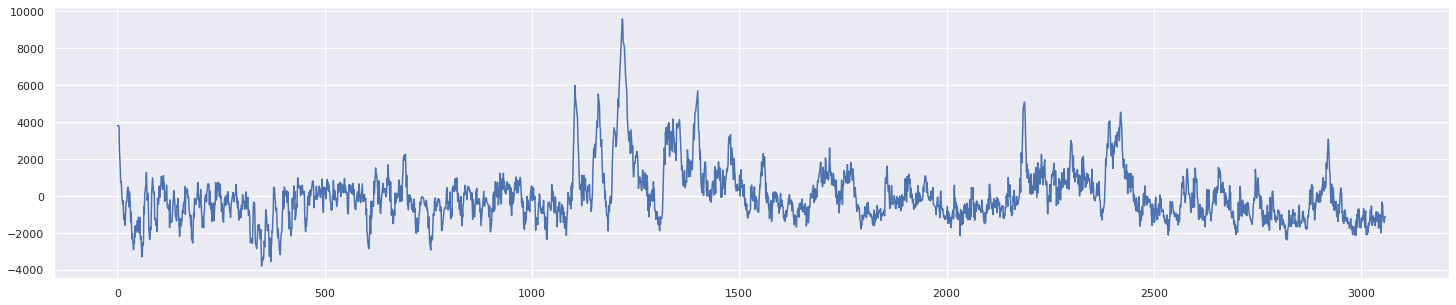

<Figure size 432x288 with 0 Axes>

In [118]:
neuron = 'neuron_128'

plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

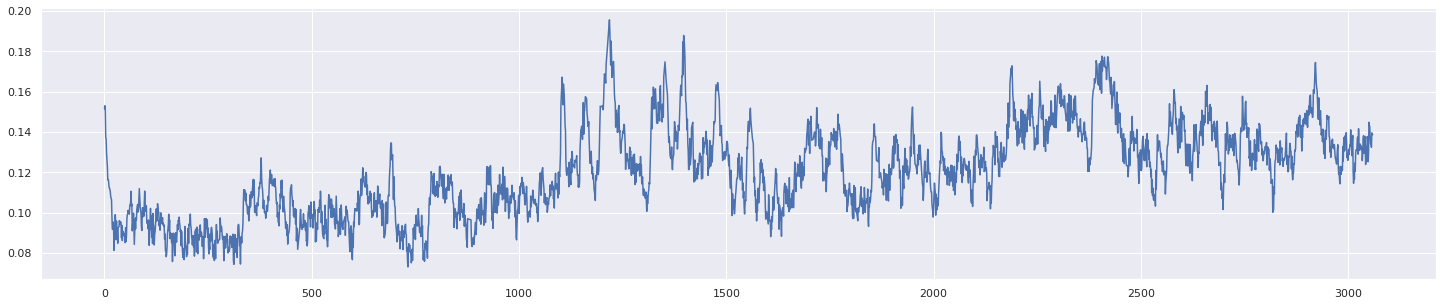

<Figure size 432x288 with 0 Axes>

In [120]:
neuron = 'neuron_128'

plt.figure(figsize=(25, 5))
project_data1.background_per_pixel = 80
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt_old)
plt.plot(t, y)
plt.figure('Example trace')

# PCA plot of the data

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=10, whiten=False)
df_pca = pca.fit_transform(df_imputed)

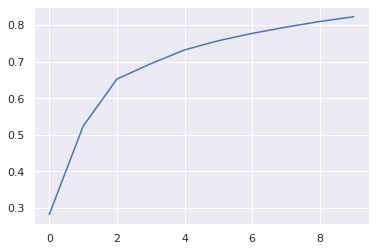

In [89]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

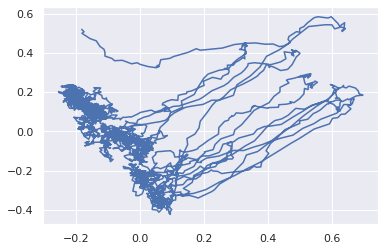

In [90]:
plt.plot(df_pca[:, 0], df_pca[:, 1])

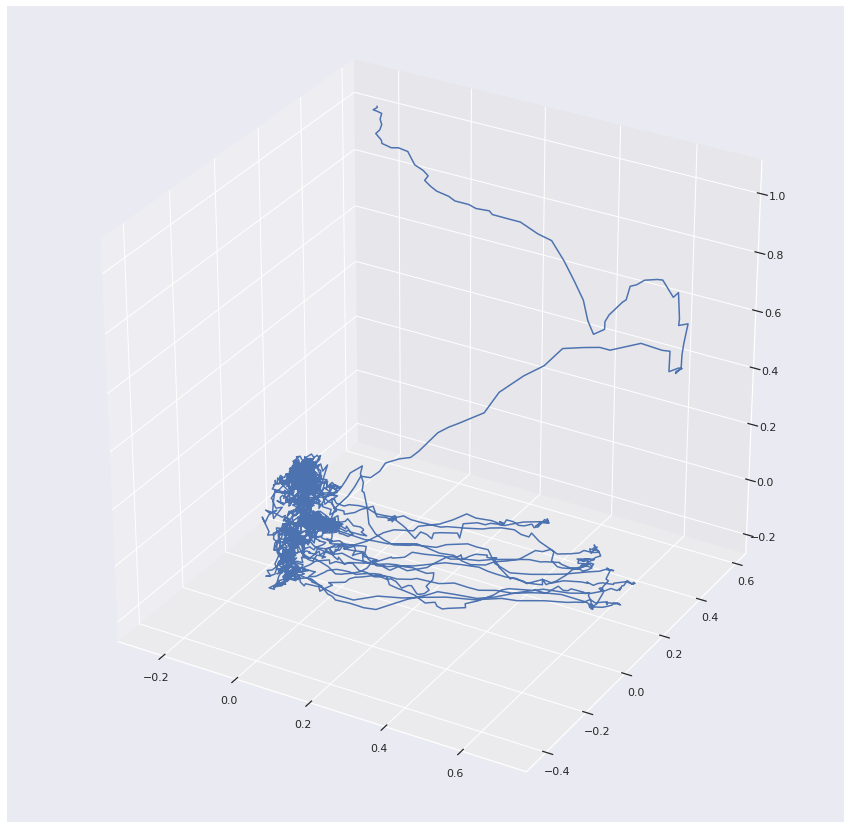

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
# p = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 3], c=np.arange(len(df_pca[:, 0])), s=60)
p = ax.plot(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2])
# fig.colorbar(p)

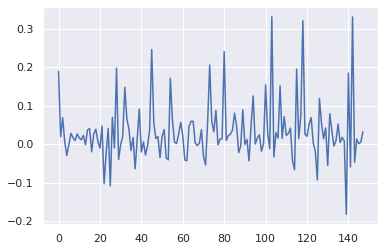

In [140]:
plt.plot(pca.components_[3, :])

# Same as above, but with delta f over f

In [216]:
neuron = 'neuron_001'
opt = dict(channel_mode='ratio_df_over_f_10', calculation_mode='integration', remove_outliers=True, filter_mode='linear_interpolation')
project_data1.background_per_pixel = 75

names = project_data1.finished_neuron_names

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

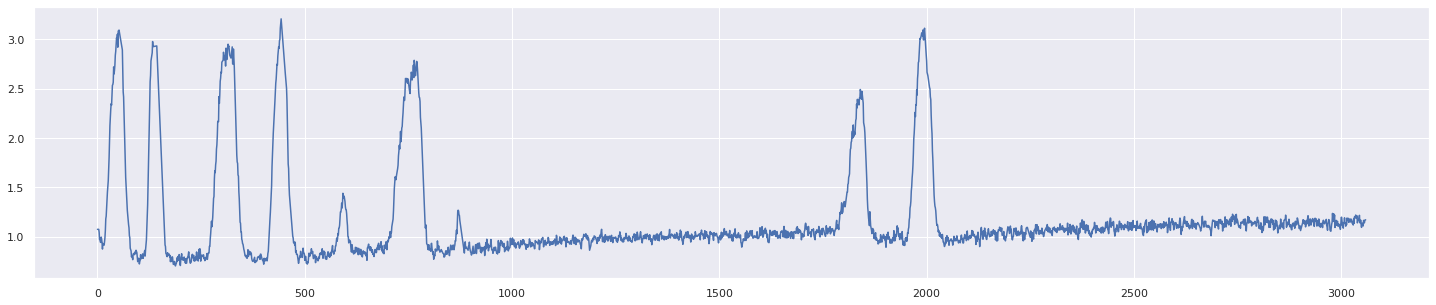

<Figure size 432x288 with 0 Axes>

In [194]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

In [217]:
# project_data1._trace_plotter.background_per_pixel = 80
df_traces = project_data1._trace_plotter.calculate_traces_full_dataframe(names=names)
df_traces.dropna(axis=1, thresh=2500, inplace=True)

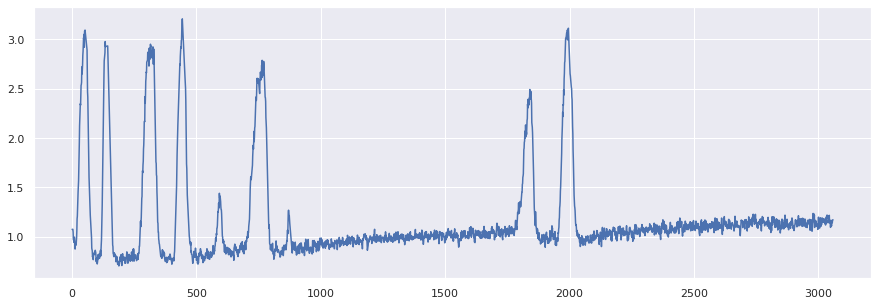

In [218]:
df_traces[neuron].plot(figsize=(15,5))

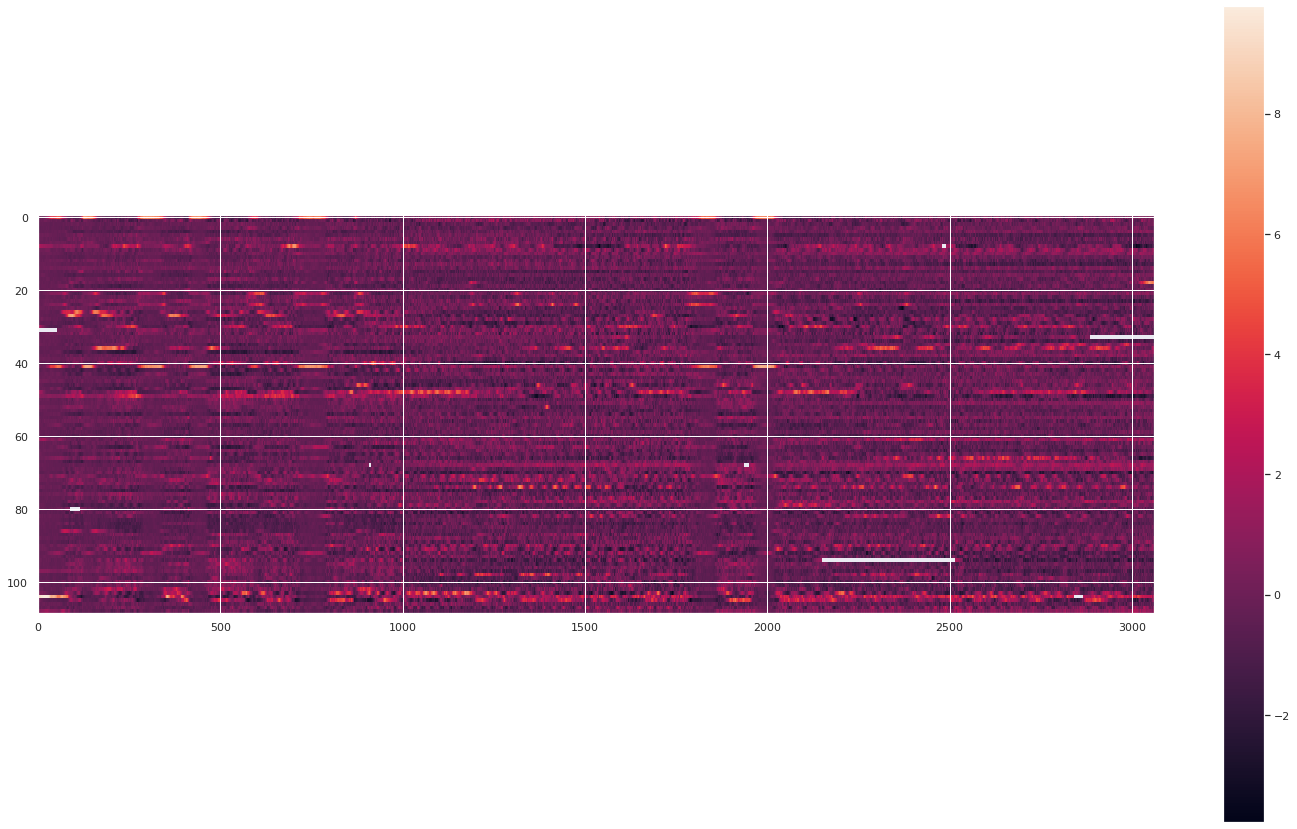

In [219]:
plt.figure(figsize=(25,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_traces.T

data_scaled = scaler.fit_transform(data)

plt.imshow(data_scaled, aspect=10)
plt.colorbar()

# Plot a clustered heatmap
From:
https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [220]:
import seaborn as sns; sns.set_theme(color_codes=True)
from wbfm.utils.general.postprocessing.position_postprocessing import impute_missing_values_in_dataframe

In [221]:
df_imputed = impute_missing_values_in_dataframe(df_traces, d=140)

In [222]:
# scaler = StandardScaler()
# data = df_imputed.T

# data_scaled = scaler.fit_transform(data)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


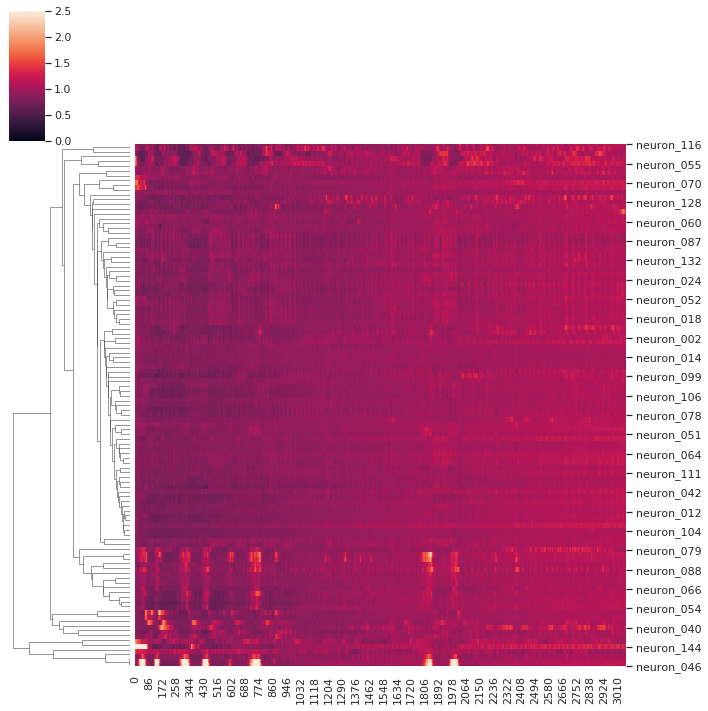

In [223]:
g = sns.clustermap(df_imputed.T, col_cluster=False, vmin=0, vmax=2.5,
                   metric="correlation")

# Dropping low activity neurons

# Heatmap for gfp worm

In [135]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/project_config.yaml"

project_data_gfp = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/3-tracking/postprocessing/combined_3d_tracks-4.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : WARNING  Did not find behavioral annotations
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/3-tracking/postprocessing/combined_3d_tracks-4.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/dat/2022-04-09_14-51_ZIM2319_worm5_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/dat/2022-04-09_14-51_ZIM2319_worm5_Ch1bigtiff_preprocessed.zarr.zip

In [138]:
neuron = 'neuron_002'
opt = dict(channel_mode='linear_model', calculation_mode='integration', remove_outliers=True, filter_mode='linear_interpolation')
opt_old = opt.copy()
opt_old['channel_mode'] = 'ratio'

<Figure size 432x288 with 0 Axes>

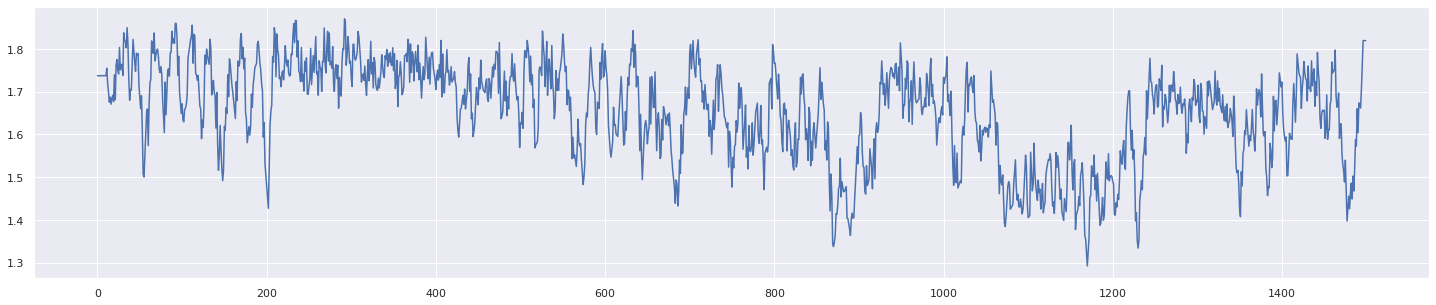

<Figure size 432x288 with 0 Axes>

In [139]:
# Old method: ratio
plt.figure(figsize=(25, 5))
t, y = project_data_gfp.calculate_traces(neuron_name=neuron, **opt_old)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

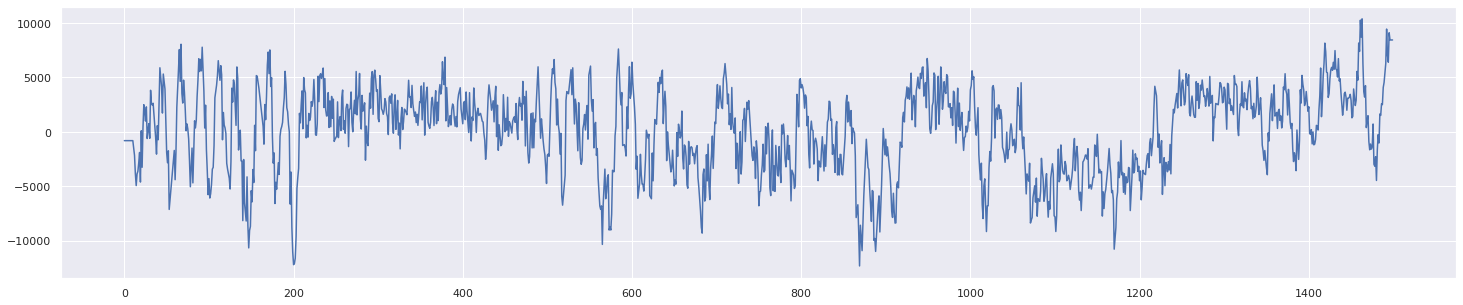

<Figure size 432x288 with 0 Axes>

In [140]:
plt.figure(figsize=(25, 5))
t, y = project_data_gfp.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

In [149]:
project_data_gfp._trace_plotter.background_per_pixel = 80

names = project_data_gfp.finished_neuron_names

df_traces = project_data_gfp._trace_plotter.calculate_traces_full_dataframe(names=names)
df_traces.dropna(axis=1, thresh=1000, inplace=True)

In [152]:
# df_traces

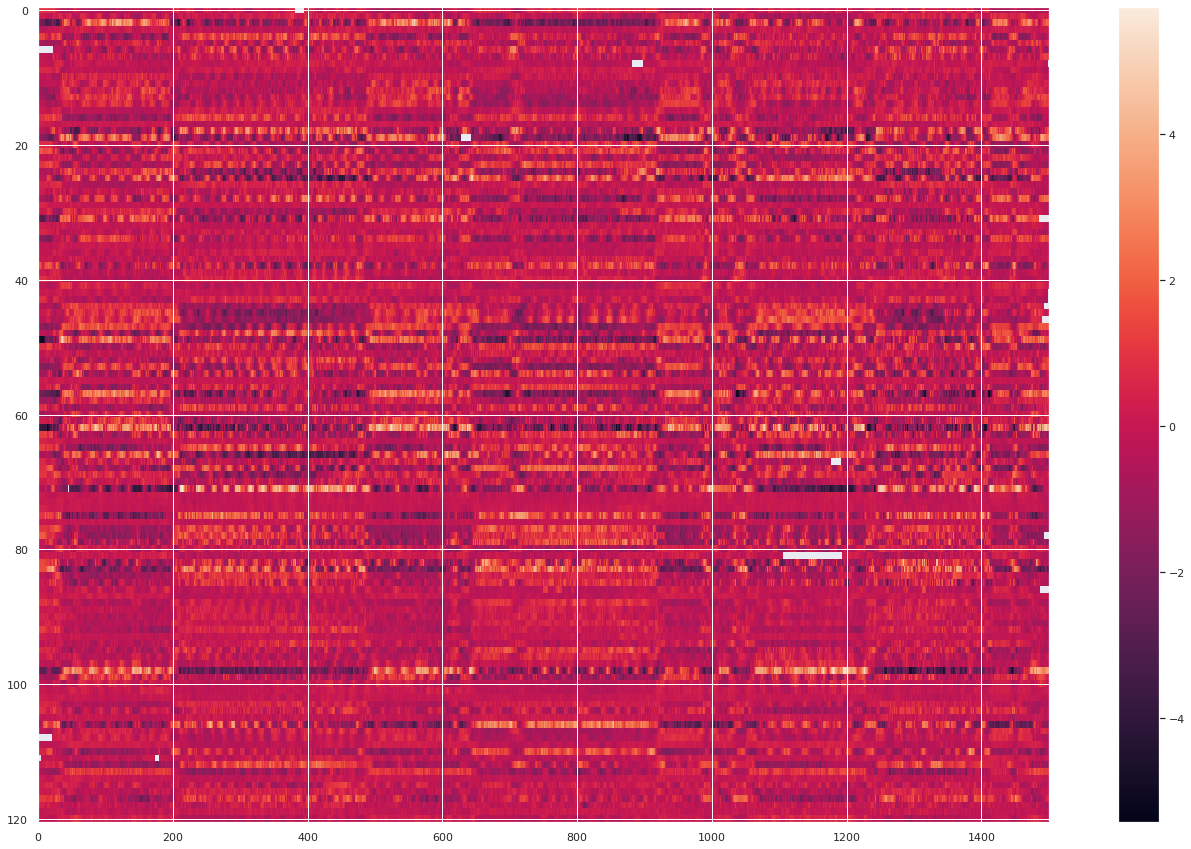

In [153]:
plt.figure(figsize=(25,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_traces.T

data_scaled = scaler.fit_transform(data)

plt.imshow(data_scaled, aspect=10)
plt.colorbar()

# Plot a clustered heatmap
From:
https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [154]:
import seaborn as sns; sns.set_theme(color_codes=True)
from wbfm.utils.general.postprocessing.position_postprocessing import impute_missing_values_in_dataframe

In [155]:
df_imputed = impute_missing_values_in_dataframe(df_traces, d=int(0.9*df_traces.shape[1]))

In [156]:
# scaler = StandardScaler()
# data = df_imputed.T

# data_scaled = scaler.fit_transform(data)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


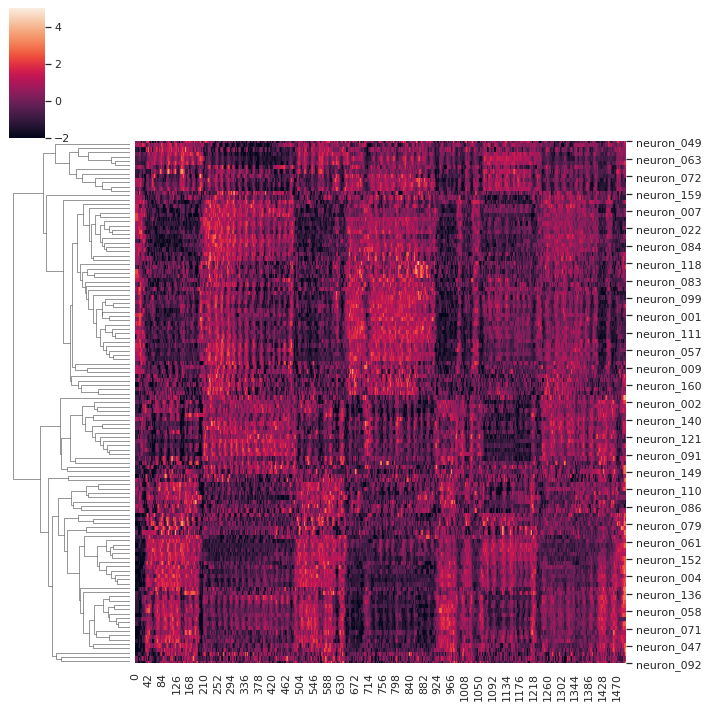

In [157]:
g = sns.clustermap(df_imputed.T, col_cluster=False, vmin=-2, vmax=5,
                   metric="correlation", z_score=0)

In [239]:
df_subset = df_imputed.loc[:, df_imputed.max() > 1.0]

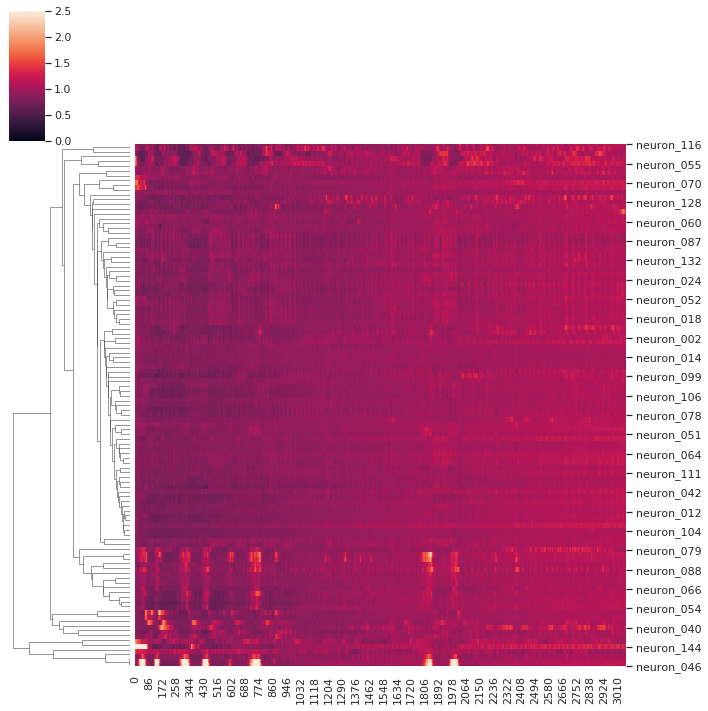

In [240]:
g = sns.clustermap(df_subset.T, col_cluster=False, vmin=0, vmax=2.5,
                   metric="correlation")

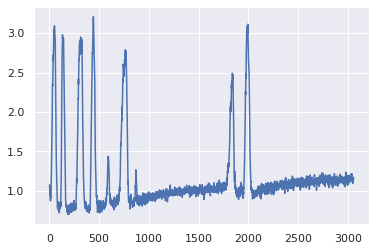

In [241]:
df_subset['neuron_001'].plot()

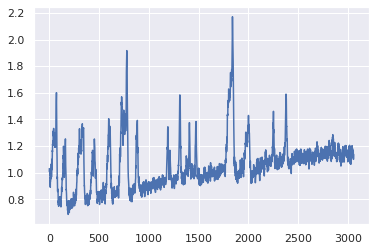

In [242]:
df_subset['neuron_026'].plot()

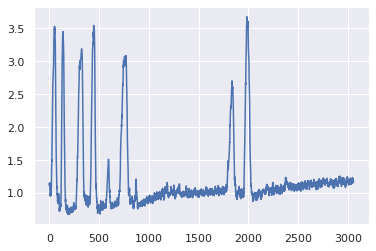

In [243]:
df_subset['neuron_046'].plot()

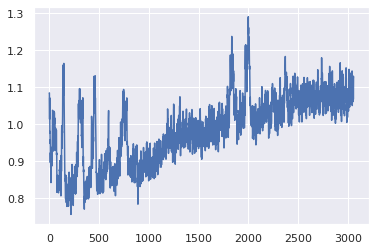

In [245]:
df_subset['neuron_008'].plot()

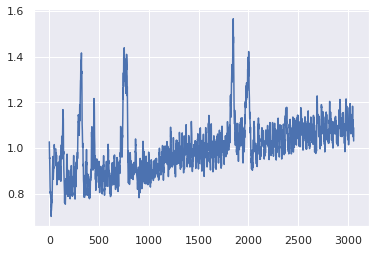

In [246]:
df_subset['neuron_034'].plot()

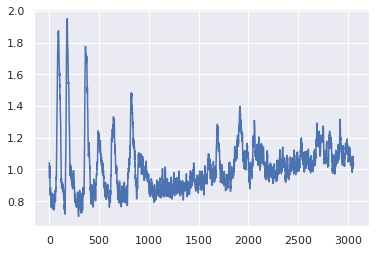

In [247]:
df_subset['neuron_029'].plot()

In [250]:
project_data1.red_traces['neuron_002']['area']

0       547.0
1       639.0
2       660.0
3       529.0
4       668.0
        ...  
3055    582.0
3056    542.0
3057    509.0
3058    567.0
3059      NaN
Name: area, Length: 3060, dtype: float64

# Plot neural network training data

In [30]:
from pathlib import Path
import pandas as pd
from wbfm.utils.tracklets.high_performance_pandas import get_names_from_df
import seaborn as sns
import os

folder_name = Path("/home/charles/Current_work/presentations/Ceneuro2022/")

In [7]:
df_track = []
df_tracklets = []

for item in folder_name.iterdir():
    if not str(item.name).endswith('.csv'):
        continue
    out = pd.read_csv(item)
    t = out['Step']
    cols = out.columns
    y = out[cols[1]]
    
    name = item.stem.split('_')[0]
    this_df = pd.DataFrame(index=t, data=list(y), columns=[name])
    
    if 'tracks' in item.stem:
        df_track.append(this_df)
    else:
        df_tracklets.append(this_df)

df_track = pd.concat(df_track, axis=1)
df_tracklets = pd.concat(df_tracklets, axis=1)

In [16]:


opt_track = dict(x=df_track.index / np.max(df_track.index), data=df_track, lw=2, label="Time-independent (Global Tracker)", color='#82B366')
opt_tracklets = dict(x=df_tracklets.index / np.max(df_tracklets.index), data=df_tracklets, lw=2, label="Time-adjacent (Tracklets)", color='#9673A6')

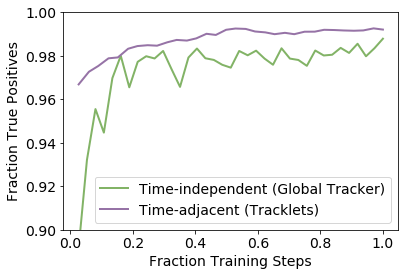

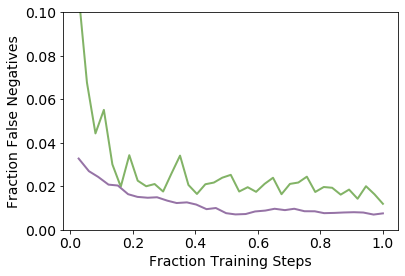

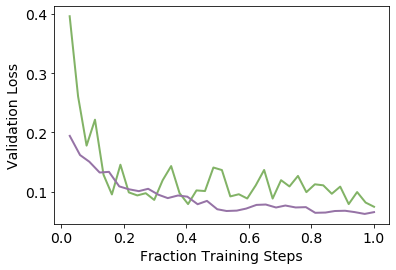

In [66]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

sns.lineplot(y='tp', **opt_track)
ax = sns.lineplot(y='tp', **opt_tracklets)
plt.legend()
plt.ylabel("Fraction True Positives");
plt.xlabel("Fraction Training Steps")
plt.ylim([0.9, 1.0])
plt.show()

fname = 'tp.png'
fname = os.path.join(folder_name, fname)
ax.figure.tight_layout()
ax.figure.savefig(fname)

##
# sns.lineplot(y='fp', **opt_track)
# sns.lineplot(y='fp', **opt_tracklets)
# # plt.legend()
# plt.ylabel("Fraction False Positives");
# plt.xlabel("Fraction Training Steps")
# plt.ylim([0.0, 0.1])
# plt.show()

# fname = 'fp.png'
# fname = os.path.join(folder_name, fname)
# plt.savefig(fname)

##
# plt.subplot(312)
sns.lineplot(y='fn', **opt_track)
ax = sns.lineplot(y='fn', **opt_tracklets)
ax.set_ylabel("Fraction False Negatives");
ax.set_xlabel("Fraction Training Steps")
ax.get_legend().remove()
ax.set_ylim([0.0, 0.1])
plt.show()

fname = 'fn.png'
fname = os.path.join(folder_name, fname)
ax.figure.tight_layout()
ax.figure.savefig(fname)

##
# plt.subplot(313)
sns.lineplot(y='val', **opt_track)
ax = sns.lineplot(y='val', **opt_tracklets)
ax.get_legend().remove()
ax.set_ylabel("Validation Loss");
ax.set_xlabel("Fraction Training Steps")
# plt.ylim([0.0, 0.1])
plt.show()

fname = 'val.png'
fname = os.path.join(folder_name, fname)
ax.figure.tight_layout()
ax.figure.savefig(fname)

# Plot tracklets + raw global tracker

Note: need to use one of my new projects, because this is a custom class that 

In [122]:
# fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/project_config.yaml"
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/project_config.yaml"

project_data2 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/3-tracking/postprocessing/combined_3d_tracks.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
Found no behavior subfolder in /scratch/neurobiology/zimmer/ulises/wbfm/20220614/data/ZIM2156_worm6, aborting
ConfigFile  : WARNING  behavior_fname search failed; returning empty object
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/3-tracking/postprocessing/combined_3d_tracks.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/dat/2022-06-14_14-04_ZIM2156_worm6_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/dat/2022-06-14_14-04

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [124]:
tracked_worm = project_data2.tracked_worm_class

0it [00:00, ?it/s]

(0, 3330)

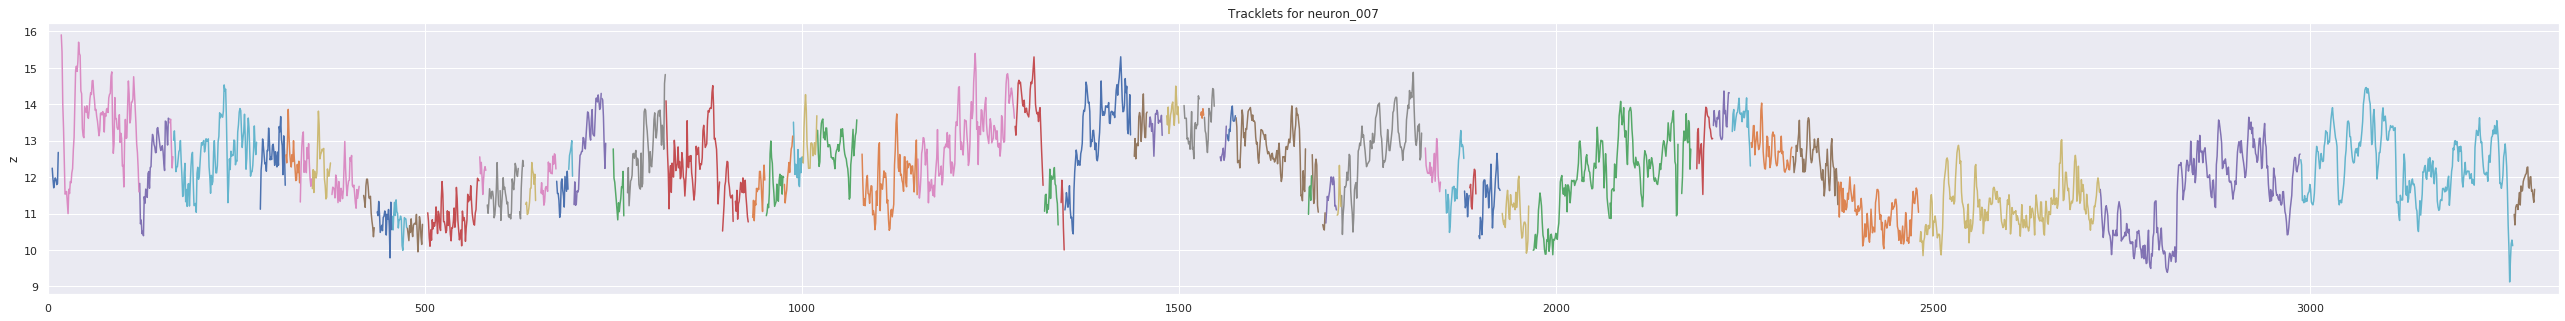

In [133]:
neuron = 'neuron_007'
font = {'font.size': 14}
plt.rcParams.update(font)

tracked_worm.plot_tracklets_for_neuron(neuron, with_names=False, with_confidence=False)
plt.xlim([0, 3330])

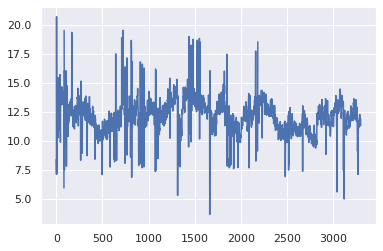

In [134]:
y_global = project_data2.intermediate_global_tracks[neuron]['z']
plt.plot(y_global)

# Scratch: remove obvious outliers

In [34]:
neuron = 'neuron_056'

opt = dict(channel_mode='ratio', calculation_mode='integration')

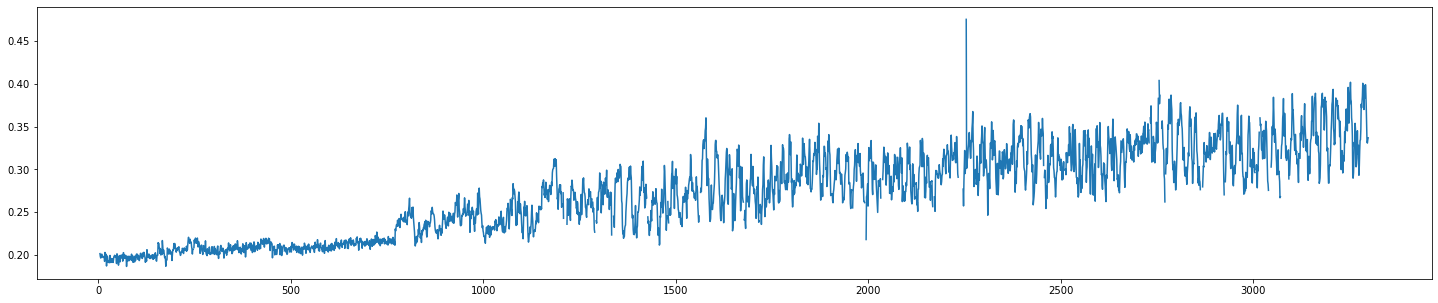

In [35]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)

Calculated error threshold at 0.024383447568854837


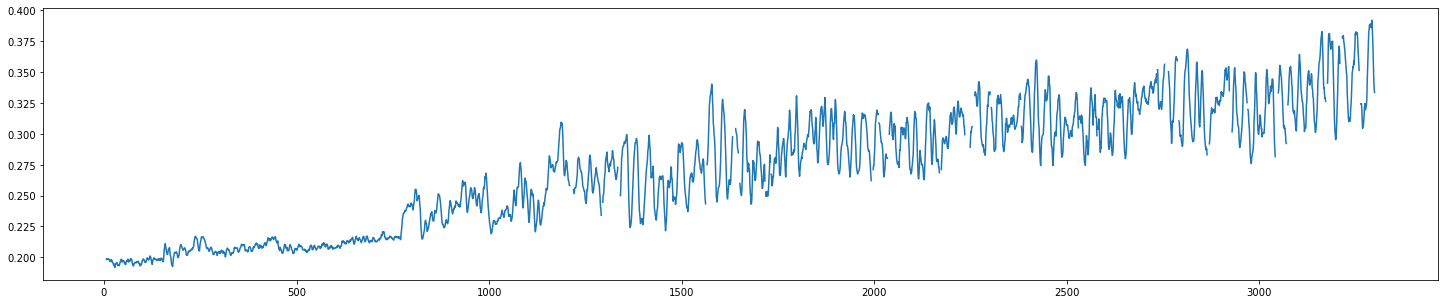

In [36]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt, remove_outliers=True, filter_mode='rolling_mean')
plt.plot(t, y)

# Scratch: do not remove spike-like signals

In [37]:
neuron = 'neuron_128'

opt = dict(channel_mode='ratio', calculation_mode='integration')

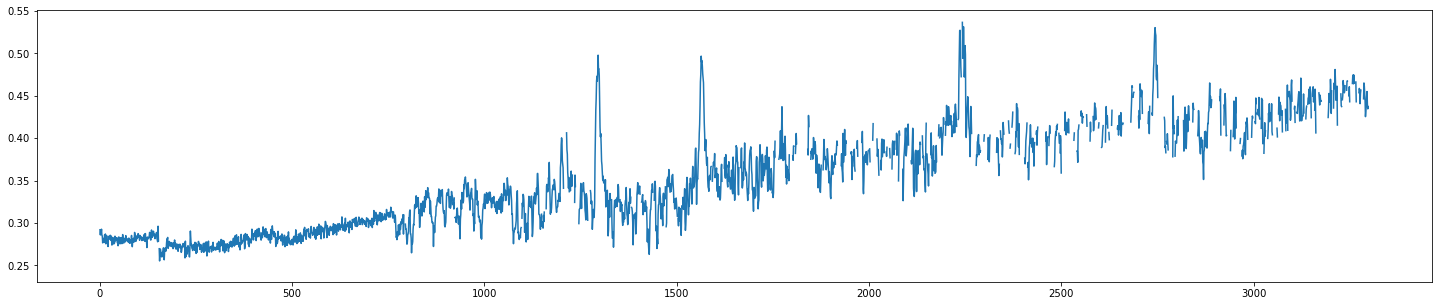

In [38]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)

Calculated error threshold at 0.023063265792468146


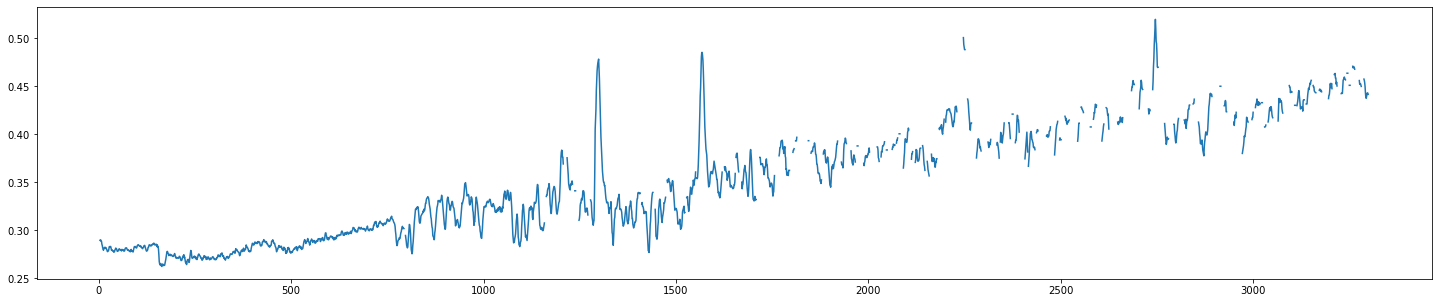

In [39]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt, remove_outliers=True, filter_mode='rolling_mean')
plt.plot(t, y)

# Scratch: delta f over f

In [152]:
y = project_data1.green_traces[neuron]['intensity_image']

In [157]:
np.nanquantile(y, 0.1)

55172.1